In [0]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_path = '/content/drive/My Drive/DSCI 303 Final Project/Data Trimming/'

In [0]:
with open('/content/drive/My Drive/DSCI 303 Final Project/Data_Trimming/trimmed_review.json') as json_file: # Open json file to load
    data = json.load(json_file) # Load the data as a big dictionary

In [0]:
df = pd.DataFrame(data['Review:Rating']) # Convert list of dictionaries {review, stars} to dataframe

In [0]:
df['review_length'] = df['review'].apply(lambda x: len(x.split(" "))) # Get review lenth in words as a features

In [10]:
df.head(2)

,review,stars,review_length
0,Total bill for this horrible service? Over $8G...,1.0,39
1,I *adore* Travis at the Hard Rock's new Kelly ...,5.0,288


Counter({5.0: 2933082, 4.0: 1468985, 1.0: 1002159, 3.0: 739280, 2.0: 542394})


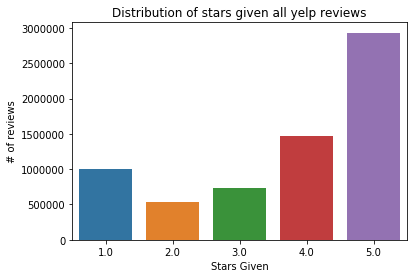

In [11]:
# How many of each star review is there?
from collections import Counter
star_cnts = Counter()

for c in df['stars']:
    star_cnts[c] += 1

print(star_cnts)

sns.barplot(x = list(star_cnts.keys()), y = list(star_cnts.values()))
plt.xlabel("Stars Given")
plt.ylabel("# of reviews")
plt.title("Distribution of stars given all yelp reviews")
plt.show() 

In [0]:
print("Percent of each class: ")
pcts = []
total_reviews_cnt = len(df)
for k, v in star_cnts.items():
    pcts.append( (k, str(round(v/total_reviews_cnt * 100,2)) + "%" ) )
print(sorted(pcts))

Percent of each class: 
[(1.0, '14.99%'), (2.0, '8.11%'), (3.0, '11.06%'), (4.0, '21.97%'), (5.0, '43.87%')]


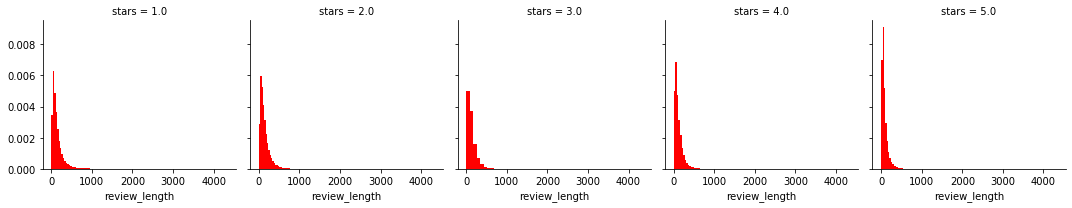

In [0]:
# Within each star count, what is the normalized distribution of the number of words in a review?
g = sns.FacetGrid(data=df, col='stars')
g.map(plt.hist,'review_length', bins=50, color='red', density = 'True')
plt.show()